# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.


### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

***

In [4]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [6]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [7]:
#Import modules
import pandas as pd
import numpy as np
from scipy import stats

In [8]:
#seperate out the samples
w = data[data.race=='w']
b = data[data.race=='b']

#find n - We'll only use one n because it's the same for both samples
n = len(w)

#find the number from each sample that recieved a call
wcall = w.call.sum()
bcall = b.call.sum()

#Find the proportion of successes and faliures for each sample
wpr = wcall/len(w)
bpr = bcall/len(b)


#multiply proportions by n
nwpr = wpr*n
nbpr = bpr*n

#multiply 1-proportions by n
nwpr1 = (1-wpr)*n
nbpr1 = (1-wpr)*n


print('\t\tWhite', '\tBlack')
print ('n:\t\t',len(w),'\t', len(b))
print ('calls:\t\t', wcall,'\t', bcall)
print ('p-hat:\t\t',round(wpr,4),'', round(bpr,4))
print ('p-hat*n:\t',int(nwpr),'\t', int(nbpr))
print ('(1 - p-hat)*n:\t',int(nwpr1),'\t', int(nbpr1))

		White 	Black
n:		 2435 	 2435
calls:		 235.0 	 157.0
p-hat:		 0.0965  0.0645
p-hat*n:	 235 	 157
(1 - p-hat)*n:	 2200 	 2200


### 1. What test is appropriate for this problem? Does CLT apply?

As the test is about proportions, so the most appropriate test is a two sample z test. The central limit theorem applies because there is a large sample size (well over 30), and the proportions of success and failures multiplied by n are both over 10. 

### 2. What are the null and alternate hypotheses?

The null hypothesis is that the observed difference between the samples is due to random variation, and that the proportion of returned calls in the sample population is in fact equal, while the alternate is that the proportion of callbacks for resumes with white sounding names in the sample population is significantly larger than those with black sounding names. let w = calls returned for white sounding names, and b = calls returned for black sounding names. 

$$H_0: \hat{p}_{w} = \hat{p}_{b}$$
$$H_a: \hat{p}_{w} > \hat{p}_{b}$$

As the null hypothesis would imply that there is little statistical evidence for racial bias in hiring practices, the danger of type 2 error (failure to reject the null hypothesis) would be a highly controversial result stepping into ["The Bell Curve"](https://en.wikipedia.org/wiki/The_Bell_Curve) territory. While a much lower p-value is to be expected, we'll keep the alpha level at $\alpha = .05$. That implicit racial bias does not exist in hiring, is an extraordinary claim requiring extraordinary evidence. There would need to be a very high statistical power before asserting evidence for it is not statistically significant.


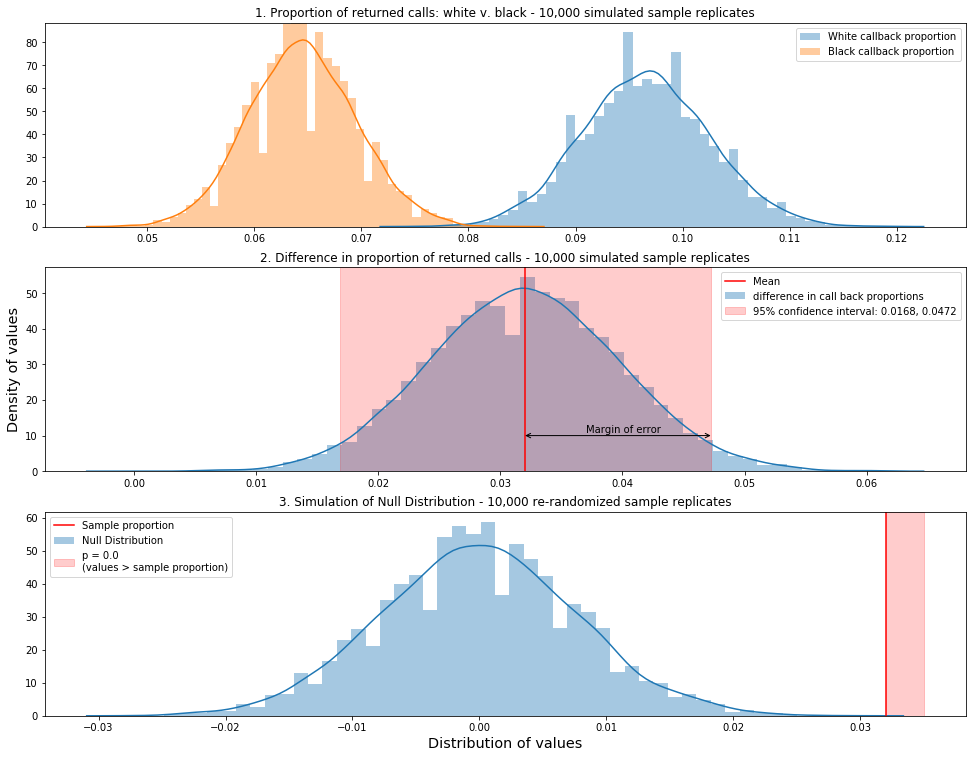

Sample difference in proportions:		 0.032
Bootstrapped mean difference in proportions:	 0.032
Bootstrapped margin of error:			 0.0152
Bootstrapped 95% confidence interval:		 0.0168, 0.0472
Bootstrapped p-value:				 0.0


In [9]:
# Your solution to Q3 here
# Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
import matplotlib.pyplot as plt
import seaborn as sns

#bootstrap sample function
def bs_sample(data, func, s_size, size=10000):
    #initialize array
    bs_s = np.empty(size)
    #start for loop for sample size 
    for i in range(size):
        #draw random sample (with replacement) sample size out of the dataset
        bs = np.random.choice(data, s_size)
        #run desired function on dataset
        out = func(bs)
        #save output of function to array
        bs_s[i] = out
    #return array
    return bs_s
        
#Function to calculate proportion of callbacks
def phat(data):
    
    #find n
    n = len(data)
    #find callbacks
    calls = data.sum()
    #find p-hat
    phat = calls/n
    return phat

#seed np.random for consistent results
np.random.seed(42)

#call functions to calculate bs of proportions
bs_pr_w = bs_sample(w.call, phat, len(w))
bs_pr_b = bs_sample(b.call, phat, len(b))

#find difference in proportions
bs_diffpr = bs_pr_w - bs_pr_b
#find mean difference
bs_diff_mu = np.mean(bs_diffpr)

#find observed difference
sdp = wpr-bpr

#find confidence interval of difference in proportions
diffconint = np.percentile(bs_diffpr, [2.5, 97.5])

#find proportionate interval
bs_diffpr

#find margin of error (bootstrapped)
bs_ME = diffconint[1] - bs_diff_mu

#arrange subplots
f, ax = plt.subplots(3, 1)

#plot distributions
sns.distplot(bs_pr_w, ax=ax[0], label='White callback proportion')
sns.distplot(bs_pr_b, ax=ax[0], label='Black callback proportion')
sns.distplot(bs_diffpr, ax=ax[1], label='difference in call back proportions')
conintstr = str(round(diffconint[0],4))+', '+str(round(diffconint[1],4))
ax[1].axvspan(diffconint[0], diffconint[1], color='r', alpha=.2, label = '95% confidence interval: '+conintstr)
ax[1].axvline(bs_diff_mu, color='r', label='Mean')
ax[1].annotate('', xy = (bs_diff_mu,10 ), \
    xytext = (diffconint[1], 10), fontsize = 11, \
    color = '#303030', arrowprops=dict(edgecolor='black', arrowstyle = '<->', shrinkA = 0, shrinkB = 0))
ax[1].text(bs_diff_mu+.005,11, 'Margin of error')
#ax[1].axvspan(bs_diff_mu, diffconint[1],  color='r', alpha=.4, label = 'Margin of Error')
ax[0].legend()
ax[1].legend()


#bootstrap p-value - reandomize the samples and compare to observed difference in proportions. 

#simulate null h
#Draw two bootstrap samples out of the data set with the length of the respective samples, and find the difference in proportions(n)
fakew = bs_sample(data.call, phat, n)
fakeb = bs_sample(data.call, phat, n)
nulldiff = fakew - fakeb

#find proportion of the null  >= than sample difference in proportions
bs_p = np.sum(nulldiff >= sdp)/len(nulldiff)
#print(bs_p)

#plot null distribution and p value
sns.distplot(nulldiff, ax=ax[2], label='Null Distribution')
ax[2].axvline(sdp, color='r', label='Sample proportion')

ax[2].axvspan(sdp, .035, color='r', alpha=.2, label='p = '+str(bs_p)+'\n(values > sample proportion)')
ax[2].legend()

#style, label and show plots
sns.set_style('darkgrid')
f.set_size_inches(16.5,12.75)
ax[0].set_title('1. Proportion of returned calls: white v. black - 10,000 simulated sample replicates')
ax[1].set_title('2. Difference in proportion of returned calls - 10,000 simulated sample replicates')
ax[2].set_title('3. Simulation of Null Distribution - 10,000 re-randomized sample replicates')
ax[2].set_xlabel('Distribution of values', fontsize='x-large')
ax[1].set_ylabel('Density of values', fontsize='x-large')


plt.show()

#print values
print('Sample difference in proportions:\t\t',round(sdp,4))
print('Bootstrapped mean difference in proportions:\t', round(bs_diff_mu,4))
print('Bootstrapped margin of error:\t\t\t', round(bs_ME,4))

print('Bootstrapped 95% confidence interval:\t\t',conintstr)
print('Bootstrapped p-value:\t\t\t\t', bs_p)

### 4. Write a story describing the statistical significance in the context or the original problem.

#### Bootstrap approach
Our base sample provides that 235 résumés with white sounding names and 157 with black sounding names received call backs. For a proportion of 0.0965 and 0.0645 callbacks to non-callbacks (roughly 10% and 6%) respectively, and a difference in proportions of roughly 0.032. To determine whether this is a statistically significant result, and not due to random sampling error, we can simulate taking the sample over again a large number of times.  We'll use 10,000.

Let's pretend our sample is a large deck of cards. In plot 1, we have separated cards with black sounding names and white sounding names into two separate decks. We then randomly chose a card from each one, noted down whether they received a call back and (critically) returned that card to the deck, before choosing randomly from the decks again. We did this until we recreated samples the same length of the originals. These samples are called 'bootstrap replicates' and approximate the random variation produced by collecting a new sample (as some cards were randomly left out, and some were randomly repeated). After producing the bootstrap replicates, We calculated the proportion of résumés receiving call backs to the total number in the replicate, and then repeated the process 10,000 times, using python functions instead of cards, to generate the distributions in the plot. As expected, the centers of these distributions converge around the proportions of 0.097 and 0.06 for white and black sounding names. 

In plot 2 we have simply plotted the difference in values between the two distributions in plot 1, which converges around a mean difference of approx 0.032. The red shaded area is the portion in which 95% of the values lie, or the confidence interval, implying that there is a 95% chance that the true difference in proportion for the sample population falls between 0.0168, and 0.0472 (rounded to 4 decimal places). The margin for error of $\pm$0.0152 is the distance between the mean difference of 0.032 and either end of the 95% confidence interval. In other words we can say with 95% confidence that people with black sounding names cold-submitting résumés in the real world receive callbacks at a proportion between 0.0168 less and 0.0472 less than the proportion of callbacks people with white sounding names receive. For purposes of comparison, the middle of this range (0.032) is approximately 62% that of the proportion of 'white' callbacks, or approximately 38% fewer callbacks.

In plot 3 we are finding the statistical significance of the result by simulating the distribution of the null hypothesis, and comparing it to the sample difference in proportions. To imagine how this is done using our deck of cards analogy, instead of splitting the deck into black sounding and white sounding names, keep all of the cards together in one deck, pick a card at random, and than note down whether it received a callback, before returning it to the deck and shuffling. Do this until you you have a bootstrap sample the same size as our original sample of 'white' résumés, and do this again until you have a bootstrap sample the same size as our original sample of 'black' résumés (in this case they are both of size n = 2435). You now have a 'fake black sample' and a 'fake white sample' with a difference in proportion of callbacks which should only be due to random chance. Note down that difference and repeat the process. We have done this 10,000 times to create the simulated null distribution in plot 3, which predictably has a mean difference of 0. The difference of proportions in the sample distribution (0.032) is indicated on the right, with values greater than that being used to calculate our p-value. The p-value is the proportion of the null distribution which overlaps with the null hypothesis, which is a different way of saying the probability that the alternate hypothesis can be observed as a result of random chance. 

In this case, not one of our 10,000 bootstrap samples resulted in difference greater than 0.032, meaning our p-value is 0.0 and there is a less than 1/10,000 chance that the sample difference is a result of random sampling error. As our p-value is far smaller than our alpha level of $\alpha$ = .05, we can say the null hypothesis ($H_0: \hat{p}_w = \hat{p}_b$) is resoundingly rejected, and there is statistically significant support for the alternate hypothesis ($H_a: \hat{p}_w > \hat{p}_b$) that résumés with white sounding names receive a greater proportion of callbacks than those with black sounding names.

#### Frequentist Approach
The frequentist statistical approaches can be used to calculate roughly the same probabilities for a given sample size, without the need to actually simulate the bootstrap samples, with the use of a few mathematical formulas. 

Note that the distributions above appear approximately normal shaped. This is because the event of receiving a callback is boolean trial, where the outcome is a binary success or failure, and therefore the distribution of the proportion of success and failures can be represented by the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution).  

For example, the variances of the distributions in the first plot are given by $\frac{\overline{p}_w(1-\overline{p}_w)}{n}$ and $\frac{\overline{p}_b(1-\overline{p}_b)}{n}$ which is the proportion of successes multiplied by the proportion of failures, all over the sample size.  Plugging in those numbers directly we would get $\frac{0.0965(1 - 0.0965)}{2435}$ and $\frac{0.0645(1 - 0.0645)}{2435}$.

However, to create our confidence interval we need to represent the distribution of the difference in proportions shown in plot 2. The mean difference is given by $\overline{p}_w - \overline{p}_b$, or 0.032. The variance is found by adding the variances of the distributions we are subtracting from each other: 

$$\frac{\overline{p}_w(1-\overline{p}_w)}{n}+\frac{\overline{p}_b(1-\hat{p}_b)}{n}$$

To calculate the confidence interval we need the standard error of the sample, which is the same as the standard deviation. This is simply the square root of the variances, so:
$$SE = \sqrt{\frac{\overline{p}_w(1-\overline{p}_w)}{n} + \frac{\overline{p}_b(1-\overline{p}_b)}{n}}$$

Margin of error (ME) is calculated by $ ME = z^*(SE)$ The critical z value ($z^*$) for a 95% confidence interval is 1.96, so we multiply that by our standard error to get our margin for error with the magic of python to get: 



In [10]:
#Calculate margin for error using... MATH! See above
SE = np.sqrt(((wpr*(1-wpr)))/n+((bpr*(1-bpr))/n))
ME = 1.96 * SE

#Calculate ME using sample difference of proportions + or - the margin of error
conint = [sdp-ME, sdp+ME]

#print results
print('Marine of error:',round(ME,4))
print('95% confidence:\t', round(conint[0],4),round(conint[1],4))

Marine of error: 0.0153
95% confidence:	 0.0168 0.0473


ME is 0.0153 when rounded to 4 decimal places which is within 0.0001 of the bootstrapped margin of error. The confidence interval is the difference of proportions plus or minus the margin of error: 0.032 $\pm$ 0.153 = 0.0168, 0.0473, Which is also within 0.0001 of the bootstrapped 95% confidence interval.

To get the p-value, we go the opposite way. we find z first, and find the distance of that z score from the mean of a standard normal distribution, and then find the proportion of the area beyond that distance remaining. z equals the sample difference of proportions over the standard error.

$$ z = \frac{(\overline{p}_{w} - \overline{p}_{b})}{SE} $$

In [11]:
#Caluculate z
z = sdp/SE 
#Caluculate p by finding the area of a standard normal distribution that exists beyond the z distance
p = stats.norm.sf(z)

print('z =', round(z, 2),'\np =',round(p, 7))

z = 4.12 
p = 1.93e-05


This results in a z score of 4.12 and a subsequent p-value of $p \approx 1.93*10^{-5}$ or approximately 0.0000193. According to the frequentist approach, There is an approximate 1.93/100,000 chance of a value as large as the sample difference in the  proportion of callbacks for white sounding and black sounding names happening as a result of random sampling error. The null hypothesis is rejected.

### 5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

While the above analysis makes clear apparent race is a significant factor in callback success, this does not necessarily mean it is the most important factor. As the black sounding v. white sounding names were randomly assigned to the sample dataset, the results only make clear that black sounding names receive fewer call backs when all other factors are equal. This seems like a good test for the existence of implicit bias,  because the random assignment of names means the hiring managers cannot possibly be picking up on any other factors that may or may not be correlated with race when making their decision of who to call back. In this dataset, it can assumed they are taking all other factors into account at the same rates, and the difference proportions of callbacks is entirely associated with whether the name "sounds black" or not. This should not create the need to amend the analysis one way or another. 

However, it might be informative to check which other factors were associated with callbacks in the data set most, and compare them with the influence of apparent race. This might help put the results in perspective.  




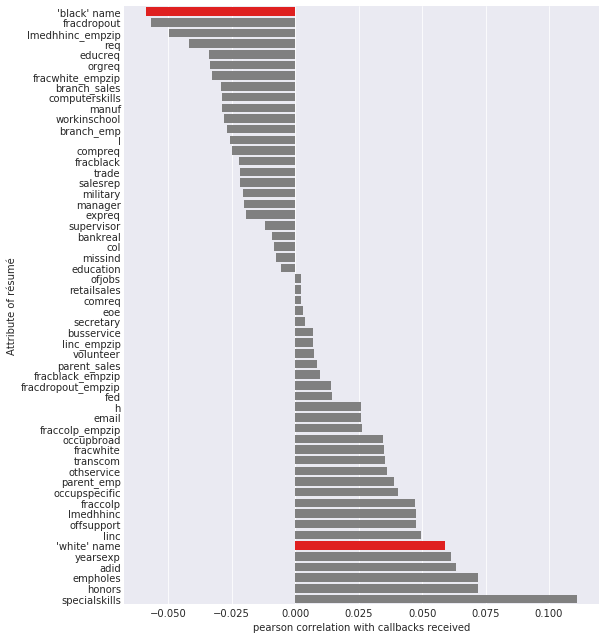

In [12]:
#Check what factors are most correlated with callbacks
#add simple "onehot" of race into dataset
datawb = data
datawb['\'white\' name'] = data.race == 'w'
datawb['\'black\' name'] = data.race=='b'

#create correlation matrix
corr = datawb.corr(method='pearson')
#narrow correlation matrix down to just calls
callcorr = corr['call']
#take calls out because it will correlate with self 1:1
callcorr.drop('call', inplace=True)
#sort values
callcorr = callcorr.sort_values(ascending=True)

clrs = ['red' if (x == '\'white\' name' or x == '\'black\' name') else 'grey' for x in callcorr.index]
#plot all the correlations with call numbers
f, ax = plt.subplots(1,1)
sns.barplot(y=callcorr.index, x=callcorr, palette=clrs)
f.set_size_inches(8.5,11)
ax.set_xlabel('pearson correlation with callbacks received')
ax.set_ylabel('Attribute of résumé')
plt.show()

A quick plot shows that having a black sounding name has the most negative correlation with a résumé receiving a callback of any of the factors tracked in the dataset, whereas the assignment of a white sounding name has the 6th highest positive correlation with callbacks. The difference between these correlations is greater than the correlation of any individual factor. 

Clearly, the perceived race of the applicant is one of the most, if not *the* most, influential factors in whether a résumé receives interest from a prospective employer.